In [5]:
import numpy as np
import pandas as pd

from astropy import units as u
from astropy.time import Time

from poliastro.twobody import Orbit
from poliastro.bodies import Sun, Earth
from poliastro.ephem import Ephem
from poliastro.iod import izzo
from poliastro.plotting import OrbitPlotter
from poliastro.plotting.orbit.backends import Plotly3D
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver


In [6]:
# # Unclean code from orbital elements

# from poliastro.bodies import Earth
# from poliastro.twobody import Orbit
# from poliastro.plotting import OrbitPlotter
# from poliastro.maneuver import Maneuver
# import numpy as np


# # Initial orbital elements of Apophis
# a = 0.9225 *u.AU # Semi-major axis (AU)
# ecc = 0.1914 *u.one # Eccentricity
# inc = 3.3319 *u.degree # Inclination (degrees)
# raan = 126.1347 *u.degree # Longitude of ascending node (degrees)
# argp = 204.1961 *u.degree # Argument of periapsis (degrees)
# nu = 126.6832  *u.degree# True anomaly (degrees)

# # Define the orbit
# apophis = Orbit.from_classical(Earth, a, ecc, np.radians(inc), np.radians(raan), np.radians(argp), np.radians(nu))

# # Plot the initial orbit
# plotter = OrbitPlotter()
# plotter.plot(apophis, label="Initial Orbit")

# # Delta-v (change in velocity)
# delta_v = Maneuver((0 * u.s, [0.001, 0, 0] * u.km / u.s)) # Change in velocity in km/s (example values)
# apophis = apophis.apply_maneuver(delta_v)

# # Plot the updated orbit after the delta-v maneuver
# plotter.plot(apophis, label="Updated Orbit")

# # Show the plots
# plotter.show()


/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels 

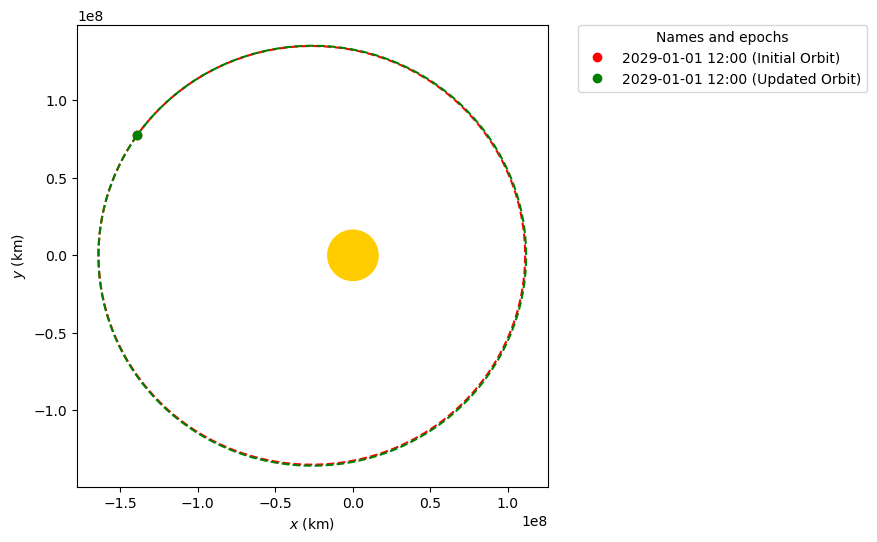

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



In [7]:
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter
from poliastro.maneuver import Maneuver
import numpy as np

# Time 
year=str(2029)
month=str(1)
day=str(1)
time=str('12:00:00')
t_rendezvous = Time(f'{year}-{month}-{day}T{time}',format='isot', scale='utc')

# Define the orbit
apophis_ephem_end = Ephem.from_horizons('Apophis',t_rendezvous)  
Apophis_orbit=Orbit.from_ephem(Sun, apophis_ephem_end,t_rendezvous)
earth_ephem_end = Ephem.from_horizons('399', t_rendezvous)
Earth_orbit=Orbit.from_ephem(Sun, earth_ephem_end, t_rendezvous)

# Apply delta-v (change in velocity) (first argument is the time instant) for tangential (multiplier on velocity of apophis)
vel = [-0.01389134, -0.00589191, -0.0025386]
mag = 50e-3
coef = np.sqrt((mag**2)/(vel[0]**2 + vel[1]**2 + vel[2]**2))
delta_v = Maneuver((0 * u.s, [vel[0]*(coef), vel[1]*(coef), vel[2]*(coef)] * u.km / u.s)) 
Apophis_orbit_new = Apophis_orbit.apply_maneuver(delta_v)

# 2D plots
plot2D = OrbitPlotter()
plot2D.plot(Apophis_orbit, label='Initial Orbit', color='red')
plot2D.plot(Apophis_orbit_new, label='Updated Orbit', color='green')
# plot2D.plot(Earth_orbit, label='Earth', color='blue')
plot2D.show()

# 3D PLots
plot3D = OrbitPlotter(backend=Plotly3D())
plot3D.plot(Apophis_orbit, label='Apophis_current', color='red')
plot3D.plot(Apophis_orbit_new, label='Apophis_deflected', color='green')
plot3D.plot(Earth_orbit, label='Earth', color='blue')
plot3D.show()

1 x 3 AU x 25.2 deg (HCRS) orbit around Sun (☉) at epoch J2000.000 (TT)


/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/Users/emilsieciechowicz/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 150 of "dubious year (Note 4)"



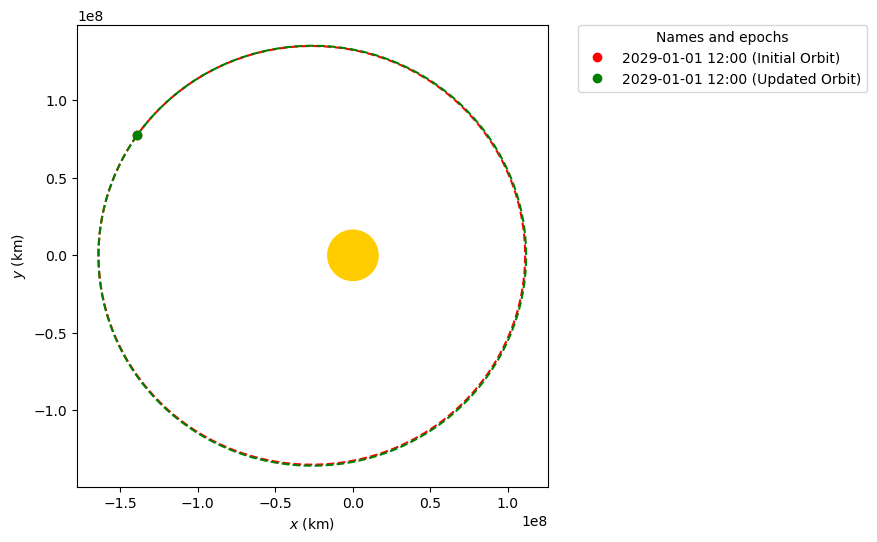

In [ ]:
# Notes for finding perfect deflection:
    # Build optimisation algorithm to minimise delta-v required to send it into a parabolic orbit (guarantees no more collisions)
        # Find formulae mathematically

